# Decision Trees

Decision Trees are a very versatile and flexible Machine Learning algirhtm, they can perform classification, regression and even multioutput tasks. They are very well suited to fitting complex datasets. Decision Trees are the fundamental concept behind Random Forests, which are among the most powerful Machine Learning algorithms.

This chapter will be divided into the following sections: -
1. Training and Visualising a Decision Tree
2. Making Predictions
3. Estimating Class Probabilities
4. The CART Training Algorithm
5. Computational Complexity
6. Gini Impurity or Entropy?
7. Regularisation Hyperparameters
8. Regression
9. Instability


## 1. Training and Visualising a Decision Tree

Given below is an implementation of a DecisionTreeClassifier on the iris dataset.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

You can visualise the trained DecisionTreeClassifier by using the plot_tree method given in sklearn, it makes use of matplotlib.

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

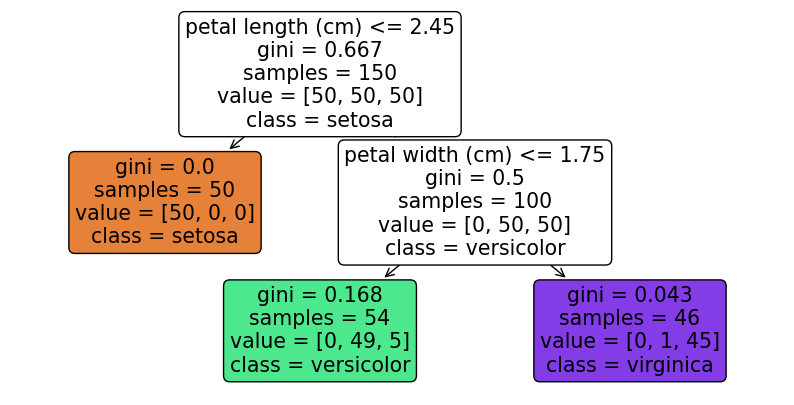

In [11]:
plt.figure(figsize=(10, 5))
plot_tree(tree_clf, feature_names= iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
plt.show();

## 2. Making Predictions

Now we will understand how the tree represented in the above plot makes its predictions. Lets take a case where you find an iris flower and you want to classify it. You will start at the root node (depth = 0, i.e. at the top): this node asks whether the flower petal length is smaller than 2.45 cm. If it is then you move down to the roots left child node (depth 1 left). In this case our node is  aleaf node, which means it does not have any child nodes, so it does not ask any further questions, it simply predicts the class, in our case the predicted class is iris setosa.

The second scenario is where the petal width is lesser than 1.75 cm, if this evaluates as true it will go 1 depth lower to its child node, this node is now a leaf node and does not ask any questions instead it classifies our instance. Which in this case is an iris versicolor. The third scenario is where the petal width is greater than 1.75 that is it evaluates as false, so it goes down 1 depth but to the right child not the left. This node is again a leaf node and hence does not ask any question instead it classifies our instance, in this case as an iris virginica.

**Note:** an important and great quality of Decision Trees, is that they require very little data preparation. In fact they dont require feature scaling and centering at all.

A nodes samples attribute counts how many training instances it applies to. For exampkle, 100 training instances have a petal length > 2.45 of which 54 have a petal width <= 1.75. A nodes value attribute tells you how many training instances of each class this node applies to for example, for the bottom right leaf node, our of the 46 samples it applies to 0 are from iris setosa, 1 is from iris versicolor and 45 are from iris virginica. (To know order of classes in the value array just check which element has the highest value in array and then element is the class it belongs to for example 45 is the highest value hence position 3 in arrray is class virginica, 49 is highest in left node at position 2 and that class is iris vergicolor.)

Finally a nodes gini attribute measures its impurity: a node is "pure" gini=0, if all its training instances it applies to belong to the same class. For example since depth-1 left node applies only to iris setosa classes (values are 0 for other classes), it is pure and the gini score is 0. The following equation shows how the training algorithm compute the gini score $G_i$ of the $i^{th}$ node. The depth-2 left node for example has a gini score equal to: $1 - (0/54)^2 -(49/54)^2 - (5/54)^2 \approx 0.168 $ to put it in english, it is equal to 1 - (values[0]/samples)^2 - (values[2]/samples)^2 ... - (values[n]/samples)^2

Gini Impurity Function:

$G_i = 1 - \sum \limits_{k=1}^{n}p_{i,k}^2$

In this equation:
* $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

Note: Sklearn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e. questions can only have yes/no answers). However other algorithms such as ID3 can produce DecisionTrees with nodes that have more than two children.

The below figure shows the DecisionTrees decision boundaries. The thick vertica line represents the decision boundary of the root node (depth 0): petal length = 2.45. Since the lefthand area is pure (only Iris septosa), it cannot be split any further. However the right hand area is impire so it splits it once again this time on the basis of petal width = 1.75. Since max depth was set to 2. The DecisionTree stops right there. If you set it to 3 then it would split it again this is indicated by the dotted lines

<br>
<img src="https://miro.medium.com/max/1178/1*EGumerhDU0rHB9Z85BYdig.png" height="300">
<br>

**Model Interpretation: White Box vs Black Box :-**
Decision Trees are intuitive and their decisions are easy to interpret. Such models are called white box models. In contrast, Random Forests or neural networks are black box movelds. They make great decisions and you can easily check the calculations that they perform to arrive to the conclusion, but their decisions and how their predictions were made are not simple to interpret. For example if a neural network says that a particular person appears on a picture it is hard to know what contributed to this prediction: what exactly did the model recognise to lead to such a conclusion. On the other hand Decision Trees provide simple classification rules that can even be applied manually as seen earlier.
A white box is a concept where we are aware of the underlying process, on the other hand a black box is one where we have no idea on the working of the underlying process. We give inputs to them and we get outputs but based on whether or not the underlying process is transparent (in this case its interpretation is simple or not i.e human understandable) it is classified as white box(it is) or black box(it is not).


## 3. Estimating Class Probabilities

A decision tree can also estimate the probability that an instance belongs to a specific class. The implementation of this is quite simple. It first uses the inputs to navigate the tree, for example if we give it the input [5, 1.5], which are petal legnth and width respectively, first it goes to the right child of the root node on depth and then it goes to that nodes left child at depth 2. After this it will return an array which contains the probability of it belonging to each class. Probability will be calculated as [0/54, 49/54, 5/54]. if you ask it to predict the class it will simply return the one with the highest probability. Implementation in sklearn is as follows: 

In [13]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [15]:
tree_clf.predict([[5, 1.5]])

array([1])

## 4. CART Training Algorithm

Sklearn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees. This algirhtm works by splitting the training data into two subsets by using a single feature $k$ and a threshold $t_k$ (e.g petal length as k and 2.45 as threshold). The question then arises as to how the model chooses the value for $k$ and $t_k$. It does this by searching for $(k, t_k)$ that produces the purest subset (weighted by size). The following equation gives the cost function that the algorithm tries to minimise.

CART cost function for classification

$J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right} $

where,
$G_{left/right}$ measures the impurity of the left/right subset
$m_{left/right}$ is the number of instances in the left/right subset

Once the CART algorithm has sucessively split the training set into two subsets, it splits the subsets further using the same logic, then the sub-subsets and so on. This process continues till it can no longer find a split that reduces impurity or till it reaches the maximum depth (defined by max_depth hyperparameter). A few other hyperparameters control additional stopping conditions (min_samples_split, min_samples_leaf, min_weight_fraction_leaf and max_leaf_nodes).

**Note:** The CART training algorithm is a greedy algorithm. This is because it tries to find the best solution at every step hoping that leads to a global optimum. This may not always lead to the most optimal solution. It does not check whether certain splits will ultimately lead to the lowest impurity possible rather it just tries to split and get the lowest possible impurity at every step. Finding the optimal tree is an NP-complete problem: it requires $O(exp(m))$ time, making the problem intractable even for small training sets. Hence we settle for the reasonably good solution which is to use the greedy approach.

## 5. Computational Complexity

Making predictions requires traversing the Decision Tree from the root to the leaf node, since decision tree are generally balances, traversing the decision tree requires going throug roughly $O(log_2(m))$ nodes. Since each node requires us to check only one feature, this takes very less time. Hence the process of making predictions is very fast even when we deal with large training sets.

The training algorithm however takes longer.This is because it must compares all features (or less if max_features is set) on all samples at each node. Comparing all the features on all samples at each node results in a training compleity of $O(n \times mlog_2(m))$ For small training sets (less than a few thousand instances), you can speed up training by presorting the data (set presort=True), but doing that will slow down training considerably for larger training sets.

## 6. Gini Impurity or Entropy?

By default the Gini Impurity is the measure that is used however this can be changed by selecting the entropy impurity instead using the criterion hyperparamter. The concept of entropy originated in thermodynamics as a measure of molecular disorder: entropy approaches zero wen molecules are still and well ordered. Entropy later spread to a variety of domains. In machine learning, entropy is frequently used as an impurity measure, a sets entropy is zero when it contains instances of only one class. The following equation shows the definition of the entropy of the i_{th} node.

For example the depth-2 left node has an entropy equal to: 

$-\frac{49}{54}log_2(\frac{49}{54}) - \frac{5}{54}log_2(\frac{5}{54}) \approx 0.445$

Equation for Entropy:

$H_i = - \sum \limits_{k=1}^np_{i,k}log_2(p_{i,k}) $

In the end both these impurities give almost always the same answer, Gini is slightly faster to compute making it a good default, the only time they differ is that Gini impurity tends to isolate the most freuqent class in its own branch of the tree while entropy tends to produce slightly more balanced trees.